In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.ResNet50 import ResNet50

In [ ]:
train_loc = '/content/drive/MyDrive/data1/TrainingData'
vel_loc = '/content/drive/MyDrive/data1/val'
test_loc = "/content/drive/MyDrive/data1/Testing"


In [ ]:
import random
SEED = 42 
np.random.seed(SEED) 
random.seed(SEED) 
tf.random.set_seed(SEED)

In [ ]:
IMAGE_SIZE = [200, 200]
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in pretrained_model.layers:
        layer.trainable=False

#resnet_model.add(pretrained_model)

In [ ]:
from glob import glob

folders = glob('/content/drive/MyDrive/dataset/Training/*')
print(len(folders))

4


In [ ]:
from tensorflow.keras.models import Model

x = Flatten()(pretrained_model.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=pretrained_model.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory(traindata,
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
vel_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

vel_set = vel_datagen.flow_from_directory(testdata,
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [ ]:
model_history1=model.fit_generator(
  train_set,
  validation_data=vel_set,
  epochs=20,
  steps_per_epoch=5,
  validation_steps=32,
  verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
5/5 - 156s - loss: 8.1061 - accuracy: 0.6438 - val_loss: 6.9794 - val_accuracy: 0.6650 - 156s/epoch - 31s/step
Epoch 2/20
5/5 - 150s - loss: 6.2515 - accuracy: 0.6812 - val_loss: 4.3543 - val_accuracy: 0.7588 - 150s/epoch - 30s/step
Epoch 3/20
5/5 - 150s - loss: 4.2320 - accuracy: 0.7812 - val_loss: 3.4728 - val_accuracy: 0.7930 - 150s/epoch - 30s/step
Epoch 4/20
5/5 - 150s - loss: 2.5812 - accuracy: 0.8562 - val_loss: 4.5088 - val_accuracy: 0.7676 - 150s/epoch - 30s/step
Epoch 5/20
5/5 - 150s - loss: 3.1006 - accuracy: 0.8188 - val_loss: 3.5571 - val_accuracy: 0.8184 - 150s/epoch - 30s/step
Epoch 6/20
5/5 - 150s - loss: 3.4947 - accuracy: 0.8562 - val_loss: 4.6685 - val_accuracy: 0.7764 - 150s/epoch - 30s/step
Epoch 7/20
5/5 - 151s - loss: 3.8915 - accuracy: 0.7750 - val_loss: 3.5070 - val_accuracy: 0.8008 - 151s/epoch - 30s/step
Epoch 8/20
5/5 - 149s - loss: 3.2608 - accuracy: 0.8188 - val_loss: 3.9153 - val_accuracy: 0.7783 - 149s/epoch - 30s/step
Epoch 9/20
5/5 - 151s - 

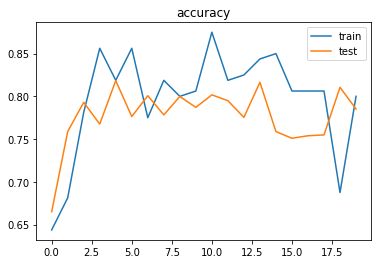

In [ ]:
plt.plot(model_history1.history['accuracy'], label = 'train')
plt.plot(model_history1.history['val_accuracy'], label = 'test')
plt.title('accuracy')
plt.legend()
plt.show()

#accuracy

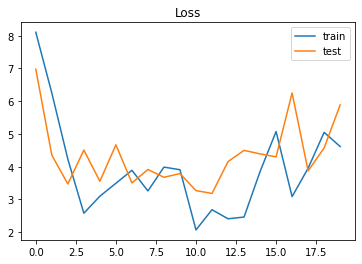

In [ ]:
plt.plot(model_history1.history['loss'], label = 'train')
plt.plot(model_history1.history['val_loss'], label = 'test')
plt.title("Loss")
plt.legend()
plt.show()
#loss function